<h2>API Data Report: What makes tik tok sounds so popular?</h2>
<h4>Jacob Nicholson</h4>
<h4>10/11/24</h4>
<p><b>Theoretical Hypothesis:</b> The sections of songs popular on tik tok share similar audiofeatures.</p>
<p><b>Statistical Hypothesis:</b> Of the top 5 songs found on a spotify playlist of the most popular tik tok songs of the past 5 years, more than 50% of them have the same audio analysis features within their sections</p>

In [124]:
import urllib
import requests
import pandas as pd
import json
import base64
from functools import reduce

In [125]:
def get_session_token(SessionID, SessionKey):
    url= 'https://accounts.spotify.com/api/token'
    data= {'grant_type': 'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).\
                                   encode("ascii"))
    header = {'Authorization' : 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url, 
                            data = data, 
                            headers = header)
    print (response.status_code)
    return response.json()['access_token']

In [126]:
keys = pd.read_csv("/Users/jacobnicholson/DataInEmergingMediaAndTech/SpotifyAPIClientID.txt")

In [127]:
#keys

In [128]:
access_token = get_session_token(keys['Client_ID'].iloc[0],keys['Client_Secret'].iloc[0])

200


I'm using these endpoints to call in the playlist, call in the tracks from those playlists, and analyze each of those tracks. I will be using the reponse items, get playlist items, get track id, and get track audio anaylisis from which i will extract the sections of the track. The possibility of this data being innacurate comes from the human in error in whoever made this playlist, the varying confidence in which the spotify API is able to label the audio analysis features, the length of the spotify sections not mathcing up with the length of their respective tik tok sounds, and the unfortunately small sample size in the end.

In [129]:
playlist_items_ep = 'https://api.spotify.com/v1/playlists/{}/tracks'
tracks_ep = 'https://api.spotify.com/v1/tracks'
tracks_AA_ep = 'https://api.spotify.com/v1/audio-analysis/{}'

In [130]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

In [131]:
session_header = {'Authorization' : 'Bearer {}'.format(access_token)}

<h5>The songs analyzed in this report will be found in this playlist:</h5>

In [132]:
playlist_id = '1H3AmBXPtLgPOwwf1WvUYb'

In [133]:
playlist_items_ep.format(playlist_id)

'https://api.spotify.com/v1/playlists/1H3AmBXPtLgPOwwf1WvUYb/tracks'

In [134]:
playlist_response = api_call(playlist_items_ep.format(playlist_id), session_header)

200


In [135]:
print(playlist_response.keys())

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])


In [136]:
playlist_df= pd.DataFrame(playlist_response['items'])
#playlist_df.head()

In [137]:
playlist_df2 = pd.DataFrame(playlist_response['items']).drop(columns = ['added_at', 'added_by', 'is_local', 'primary_color', 'video_thumbnail'])
#playlist_df2.head()

In [138]:
#playlist_df2.columns

In [139]:
songs_ids_df = pd.DataFrame({
    'Song Title': [track['name'] for track in playlist_df2['track']],
    'Song ID': [track['id'] for track in playlist_df2['track']],
    'Popularity': [track['popularity'] for track in playlist_df2['track']],
    'Song Artist': [', '.join([artist['name'] for artist in track['artists']]) for track in playlist_df2['track']],
})

<h4>Below I breifly tried to create a dataframe using every single song from this playlist, but I had trouble getting the dataframe to function</h4>

In [155]:
song_ids = songs_ids_df['Song ID'].tolist()
limited_song_ids = song_ids[:50]
ids_string = ','.join(limited_song_ids)
#ids_string

In [156]:
song_ids = songs_ids_df['Song ID'].tolist()
limited_song_ids = song_ids[:50]
ids_string = ','.join(limited_song_ids)

In [157]:
song_ids_df2 = pd.DataFrame({'Song ID': limited_song_ids})
#song_ids_df2

In [158]:
song_ids_response = api_call(tracks_AA_ep.format(ids_string), session_header)
songids_df = pd.DataFrame(song_ids_response['sections'])
songids_df.head(100)

400


KeyError: 'sections'

<h4>I decided to insted just work with the top 5 most popular songs</h4>

In [144]:
sorted_songs_ids_df = songs_ids_df.sort_values(by='Popularity', ascending=False)
sorted_songs_ids_df.head()

,Song Title,Song ID,Popularity,Song Artist
0,Alibi (with Pabllo Vittar & Yseult),5496lks6V3fh1mZAB6IAap,89,"Sevdaliza, Pabllo Vittar, Yseult"
1,Move,1BJJbSX6muJVF2AK7uH1x4,89,"Adam Port, Stryv, Keinemusik, Orso, Malachiii"
13,greedy,3rUGC1vUpkDG9CZFHMur1t,87,Tate McRae
5,Beautiful Things,6tNQ70jh4OwmPGpYy6R2o9,87,Benson Boone
33,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,86,"David Guetta, Bebe Rexha"


In [145]:
track1_id = '5496lks6V3fh1mZAB6IAap'
track2_id = '1BJJbSX6muJVF2AK7uH1x4'
track3_id = '3rUGC1vUpkDG9CZFHMur1t'
track4_id = '6tNQ70jh4OwmPGpYy6R'
track5_id = '4uUG5RXrOk84mYEfFvj3cK'

<P>With these songs, I will find the segments for each of them and comapare </P>

In [146]:
tracks_AA_response = api_call(tracks_AA_ep.format(track1_id), session_header)
tracks1_df = pd.DataFrame(tracks_AA_response['sections'])
tracks1_df.head(100)

200


,start,duration,confidence,loudness,tempo,tempo_confidence,key,key_confidence,mode,mode_confidence,time_signature,time_signature_confidence
0,0.00000,13.80644,1.000,-11.107,127.141,0.607,2,0.000,1,0.000,4,1.0
1,13.80644,17.00820,1.000,-5.526,127.236,0.737,11,0.678,0,0.676,4,1.0
2,30.81464,13.21864,0.629,-7.306,126.817,0.444,11,0.818,0,0.709,4,1.0
3,44.03328,13.22499,0.356,-4.701,126.996,0.528,4,0.294,0,0.379,4,1.0
4,57.25827,19.38321,0.148,-5.471,126.978,0.730,11,0.036,0,0.380,4,1.0
5,76.64148,12.74938,0.488,-6.484,127.134,0.380,11,0.598,0,0.590,4,1.0
6,89.39086,13.69380,0.301,-4.418,127.074,0.537,11,0.662,0,0.605,4,1.0
7,103.08466,25.98935,0.086,-5.506,126.924,0.502,4,0.216,0,0.058,4,1.0
8,129.07400,32.58195,0.315,-4.602,127.062,0.503,11,0.730,0,0.743,4,1.0


In [147]:
tracks_AA_response2 = api_call(tracks_AA_ep.format(track2_id), session_header)
tracks2_df = pd.DataFrame(tracks_AA_response2['sections'])
#tracks2_df.head(100)

200


In [148]:
tracks_AA_response3 = api_call(tracks_AA_ep.format(track3_id), session_header)
tracks3_df = pd.DataFrame(tracks_AA_response3['sections'])
#tracks3_df.head(100)

200


In [153]:
tracks_AA_response4 = api_call(tracks_AA_ep.format(track4_id), session_header)
tracks4_df = pd.DataFrame(tracks_AA_response3['sections'])
#tracks4_df.head(100)

400


In [150]:
tracks_AA_response5 = api_call(tracks_AA_ep.format(track5_id), session_header)
tracks5_df = pd.DataFrame(tracks_AA_response5['sections'])
#tracks5_df.head(100)

200


<H3>After listening to these songs I can connect them to the parts on tik tok that are popular by the start seconds</H3>

In [152]:
track1_tt_section = tracks1_df.iloc[8]
track2_tt_section = tracks2_df.iloc[2]
track3_tt_section = tracks3_df.iloc[2]
track4_tt_section = tracks4_df.iloc[5]
track5_tt_section = tracks5_df.iloc[2]

In [37]:
combined_tt_sections = pd.DataFrame([track1_tt_section, track2_tt_section, track3_tt_section, track4_tt_section, track5_tt_section,])
combined_tt_sections.head(5)

,start,duration,confidence,loudness,tempo,tempo_confidence,key,key_confidence,mode,mode_confidence,time_signature,time_signature_confidence
8,129.07400,32.58195,0.315,-4.602,127.062,0.503,11.0,0.730,0.0,0.743,4.0,1.000
2,57.09579,52.99827,0.418,-8.718,119.995,0.769,8.0,0.578,0.0,0.577,4.0,1.000
2,21.64304,17.29808,0.474,-2.547,110.881,0.396,6.0,0.407,0.0,0.539,1.0,0.857
5,76.24325,15.66488,0.828,-5.430,111.064,0.743,11.0,0.549,0.0,0.551,4.0,1.000
2,31.51323,14.53210,0.863,-2.721,128.093,0.341,7.0,0.166,0.0,0.516,4.0,1.000


Matplotlib is building the font cache; this may take a moment.


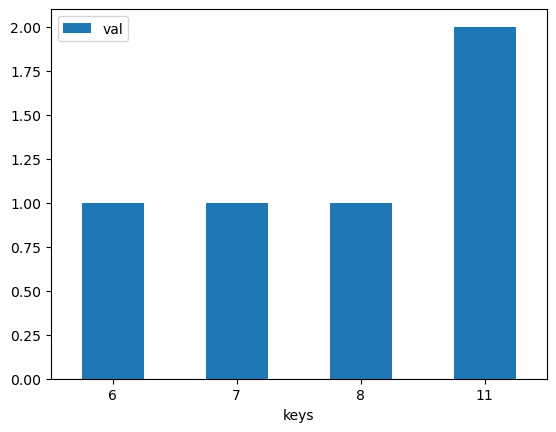

In [154]:
tt_sections_plot = pd.DataFrame({'keys':['6', '7', '8', '11'], 'val':[1, 1, 1, 2]})
ax = tt_sections_plot.plot.bar(x='keys', y='val', rot=0)

They are potential trends that can be seen within these collected song sections, such as repeated keys, time signatures, and tempos, however in order to draw better conclusions, we would need to see a larger sample size, hopefully from the enitre playlist. This could be done be indidually going through and finding the proper sections of each song, or possibly being able to connect all the song ids into one dataframe and sorting them by the section attributes. If i could get data from Tik Tok, I could possibly sort through that data frame and grab only the sections of the song that are popular on tik tok.